
<h1> CS550 2023-2024 W: Assignment 1 <h1>

General Guidelines
1. The training dataset for all the problems can be found here
2. The submission file must be of .zip format and should contain the relevant .ipynb files and an
optional report.pdf. Although .ipynb is an acceptable report as well. Bonus marks will be given
for good explanation of results, experimentation and visualizations.
3. Do not plagiarize as it is considered highly unethical in academia. Do cite any websites or articles
that you may have used while solving these questions.
4. Even though the assignments are individually graded, we encourage group discussion and so you
may mention a few collaborators, although if too much similarity is found, the involved
parties shall be penalized/debarred. There should not be more than 2 collaborators.
5. Please feel free to reach out to me over email. You may also hit any of the TAs up for doubts.
6. If anyone does not have a very good laptop, please try google collab. It is a very simple to use
and you may also import files from your drive. You may download the notebook as an.ipynb file
and submit it on canvas.
7. We shall be sharing a test set in the final week before the deadline. Please submit the predic-
tions.csv in the prescribed format (shall be conveyed later). If anyone does it earlier, you may
inform us and we shall prepone the evaluations :)
8. Ranking shall be prepared based on the aforementioned test set evaluations. Top 3 students shall
be given some bonus marks

Body Temprature dataset : Linear Regression [35 marks]
To evaluate the benefit of implementing standardized deployment and acquisition practices in the
measurement of elevated body temperature (EBT) with infrared thermographs (IRTs), a study was
conducted with more than a thousand subjects. Subject oral temperatures were measured and facial
thermal images captured with two evaluated IRTs. Based on the thermal images, temperatures from
different locations on the face were extracted based on developed method and are listed in six CSV
file as the open database. All data in these files has been de-identified. The 33 features consist of gen-
der, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the
thermal images. The dataset is intended to be used in a regression task to predict the oral temperature
using the environment information as well as the thermal image readings. (There are 2 target columns)
Link to the the dataset - data
1. Perform Exploratory data analysis and study the features of the dataset. Perform the necessary
data cleaning, feature extraction and give a brief note of your understanding of the features. Use
various plotting libraries such as matplotlib, seaborn and plotly to draw effective visualizations
of the dataset to make it easier for us to check assignments :)
1
2. Try to model this data using your own linear regressor. Do not use any inbuilt functions or
else negative points shall be awarded. Evaluate the performance using various metrics such as
R-squared error, RMSE etc. The more the merrier ! Also explain your results and compare it
with pseudoinverse based regressor. You may your own various batch size and learning rate. Be
prepared as we might randomly pick you up for a demo :)
3. Experiment with the training process and plot the loss with the number of iterations of the
gradient-descent based linear regressor. Experiment with the injection of noise in the inputs and
the parameters. What did you understand from this exercise ? Suggest a use-case based on your
understanding.

Import necessary libraries

## Part-a

In [36]:
# !pip install pandas seaborn numpy matplotlib
# !pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# cd drive/MyDrive/dataset/ML_5thSem_dataset/Train_datasets

In [3]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 4207-0599

 Directory of e:\Data Science\ML_Notes\Assignment

27-02-2024  20:56    <DIR>          .
27-02-2024  17:02    <DIR>          ..
27-02-2024  20:56            83,333 CS_550_Assignment_1.pdf
27-02-2024  20:31           402,575 ML_Assignment.ipynb
26-02-2024  20:41           248,236 train_data_question_1.csv
26-02-2024  20:41           133,782 train_data_question_2.csv
26-02-2024  20:41     4,574,916,621 train_data_question_3.csv
               5 File(s)  4,575,784,547 bytes
               2 Dir(s)  345,458,876,416 bytes free


In [4]:
df = pd.read_csv("train_data_question_1.csv")

In [8]:
df.sample(4)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
75,Female,21-25,White,25.3,36.9,0.73,1.165,35.935000,35.6850,34.480000,...,34.827500,34.862500,35.0725,35.442500,35.3225,36.042500,35.880000,35.925000,37.368794,37.500885
880,Male,18-20,White,24.1,18.8,0.65,0.880,36.132500,35.9450,35.580000,...,35.205000,35.000000,35.1125,35.657500,35.4850,36.267500,35.792500,35.825000,36.958405,37.177106
436,Male,21-25,White,24.2,22.7,0.60,0.890,35.173333,34.8600,33.806667,...,33.656667,33.813333,34.0500,35.133333,34.5900,35.956667,35.906667,35.956667,36.867312,36.831454
697,Male,26-30,Asian,24.2,33.8,0.70,1.235,35.345000,35.7325,34.590000,...,35.092500,35.090000,34.8975,35.632500,35.3700,35.900000,35.877500,35.897500,36.955087,37.555193


In [5]:
df.dropna(inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,24.095207,28.748039,0.737146,0.966147,35.599781,35.616831,34.894854,35.019171,35.663095,35.590114,...,34.567719,34.490904,34.586251,35.424491,35.098431,36.087569,35.806164,35.838945,36.976143,37.028781
std,1.321147,13.134343,2.586731,0.364392,0.581024,0.554587,0.720241,0.637929,0.557746,0.575623,...,0.687794,0.676968,0.736897,0.528922,0.584000,0.495710,0.565491,0.565612,0.437538,0.577912
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.500392,35.429644
25%,23.400000,17.525000,0.600000,0.770000,35.245000,35.272500,34.461250,34.655625,35.335000,35.243125,...,34.181250,34.095625,34.228125,35.115625,34.760000,35.775625,35.473125,35.498125,36.724969,36.677206
50%,24.000000,26.250000,0.620000,0.940000,35.552500,35.577500,34.917083,35.000000,35.603750,35.535000,...,34.607500,34.508750,34.626250,35.392500,35.105000,36.028750,35.786250,35.822500,36.925229,36.956212
75%,24.700000,36.200000,0.700000,1.137500,35.877500,35.890000,35.300000,35.373750,35.911875,35.857500,...,34.976250,34.889375,35.022500,35.686250,35.419375,36.279375,36.087500,36.120000,37.119943,37.242411
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.733519,40.621254


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       918 non-null    object 
 1   Age          918 non-null    object 
 2   Ethnicity    918 non-null    object 
 3   T_atm        918 non-null    float64
 4   Humidity     918 non-null    float64
 5   Distance     918 non-null    float64
 6   T_offset1    918 non-null    float64
 7   Max1R13_1    918 non-null    float64
 8   Max1L13_1    918 non-null    float64
 9   aveAllR13_1  918 non-null    float64
 10  aveAllL13_1  918 non-null    float64
 11  T_RC1        918 non-null    float64
 12  T_RC_Dry1    918 non-null    float64
 13  T_RC_Wet1    918 non-null    float64
 14  T_RC_Max1    918 non-null    float64
 15  T_LC1        918 non-null    float64
 16  T_LC_Dry1    918 non-null    float64
 17  T_LC_Wet1    918 non-null    float64
 18  T_LC_Max1    918 non-null    float64
 19  RCC1         

In [13]:
df.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.951586,36.983498
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.074903,36.988489
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.372149,37.799083
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.759012,36.629486
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.727061,37.279866


## Preprocessing the numerical dataset

In [8]:
numerical_df = df.drop(columns=['Gender','Age','Ethnicity']).reset_index()

In [16]:
numerical_df.shape

(918, 33)

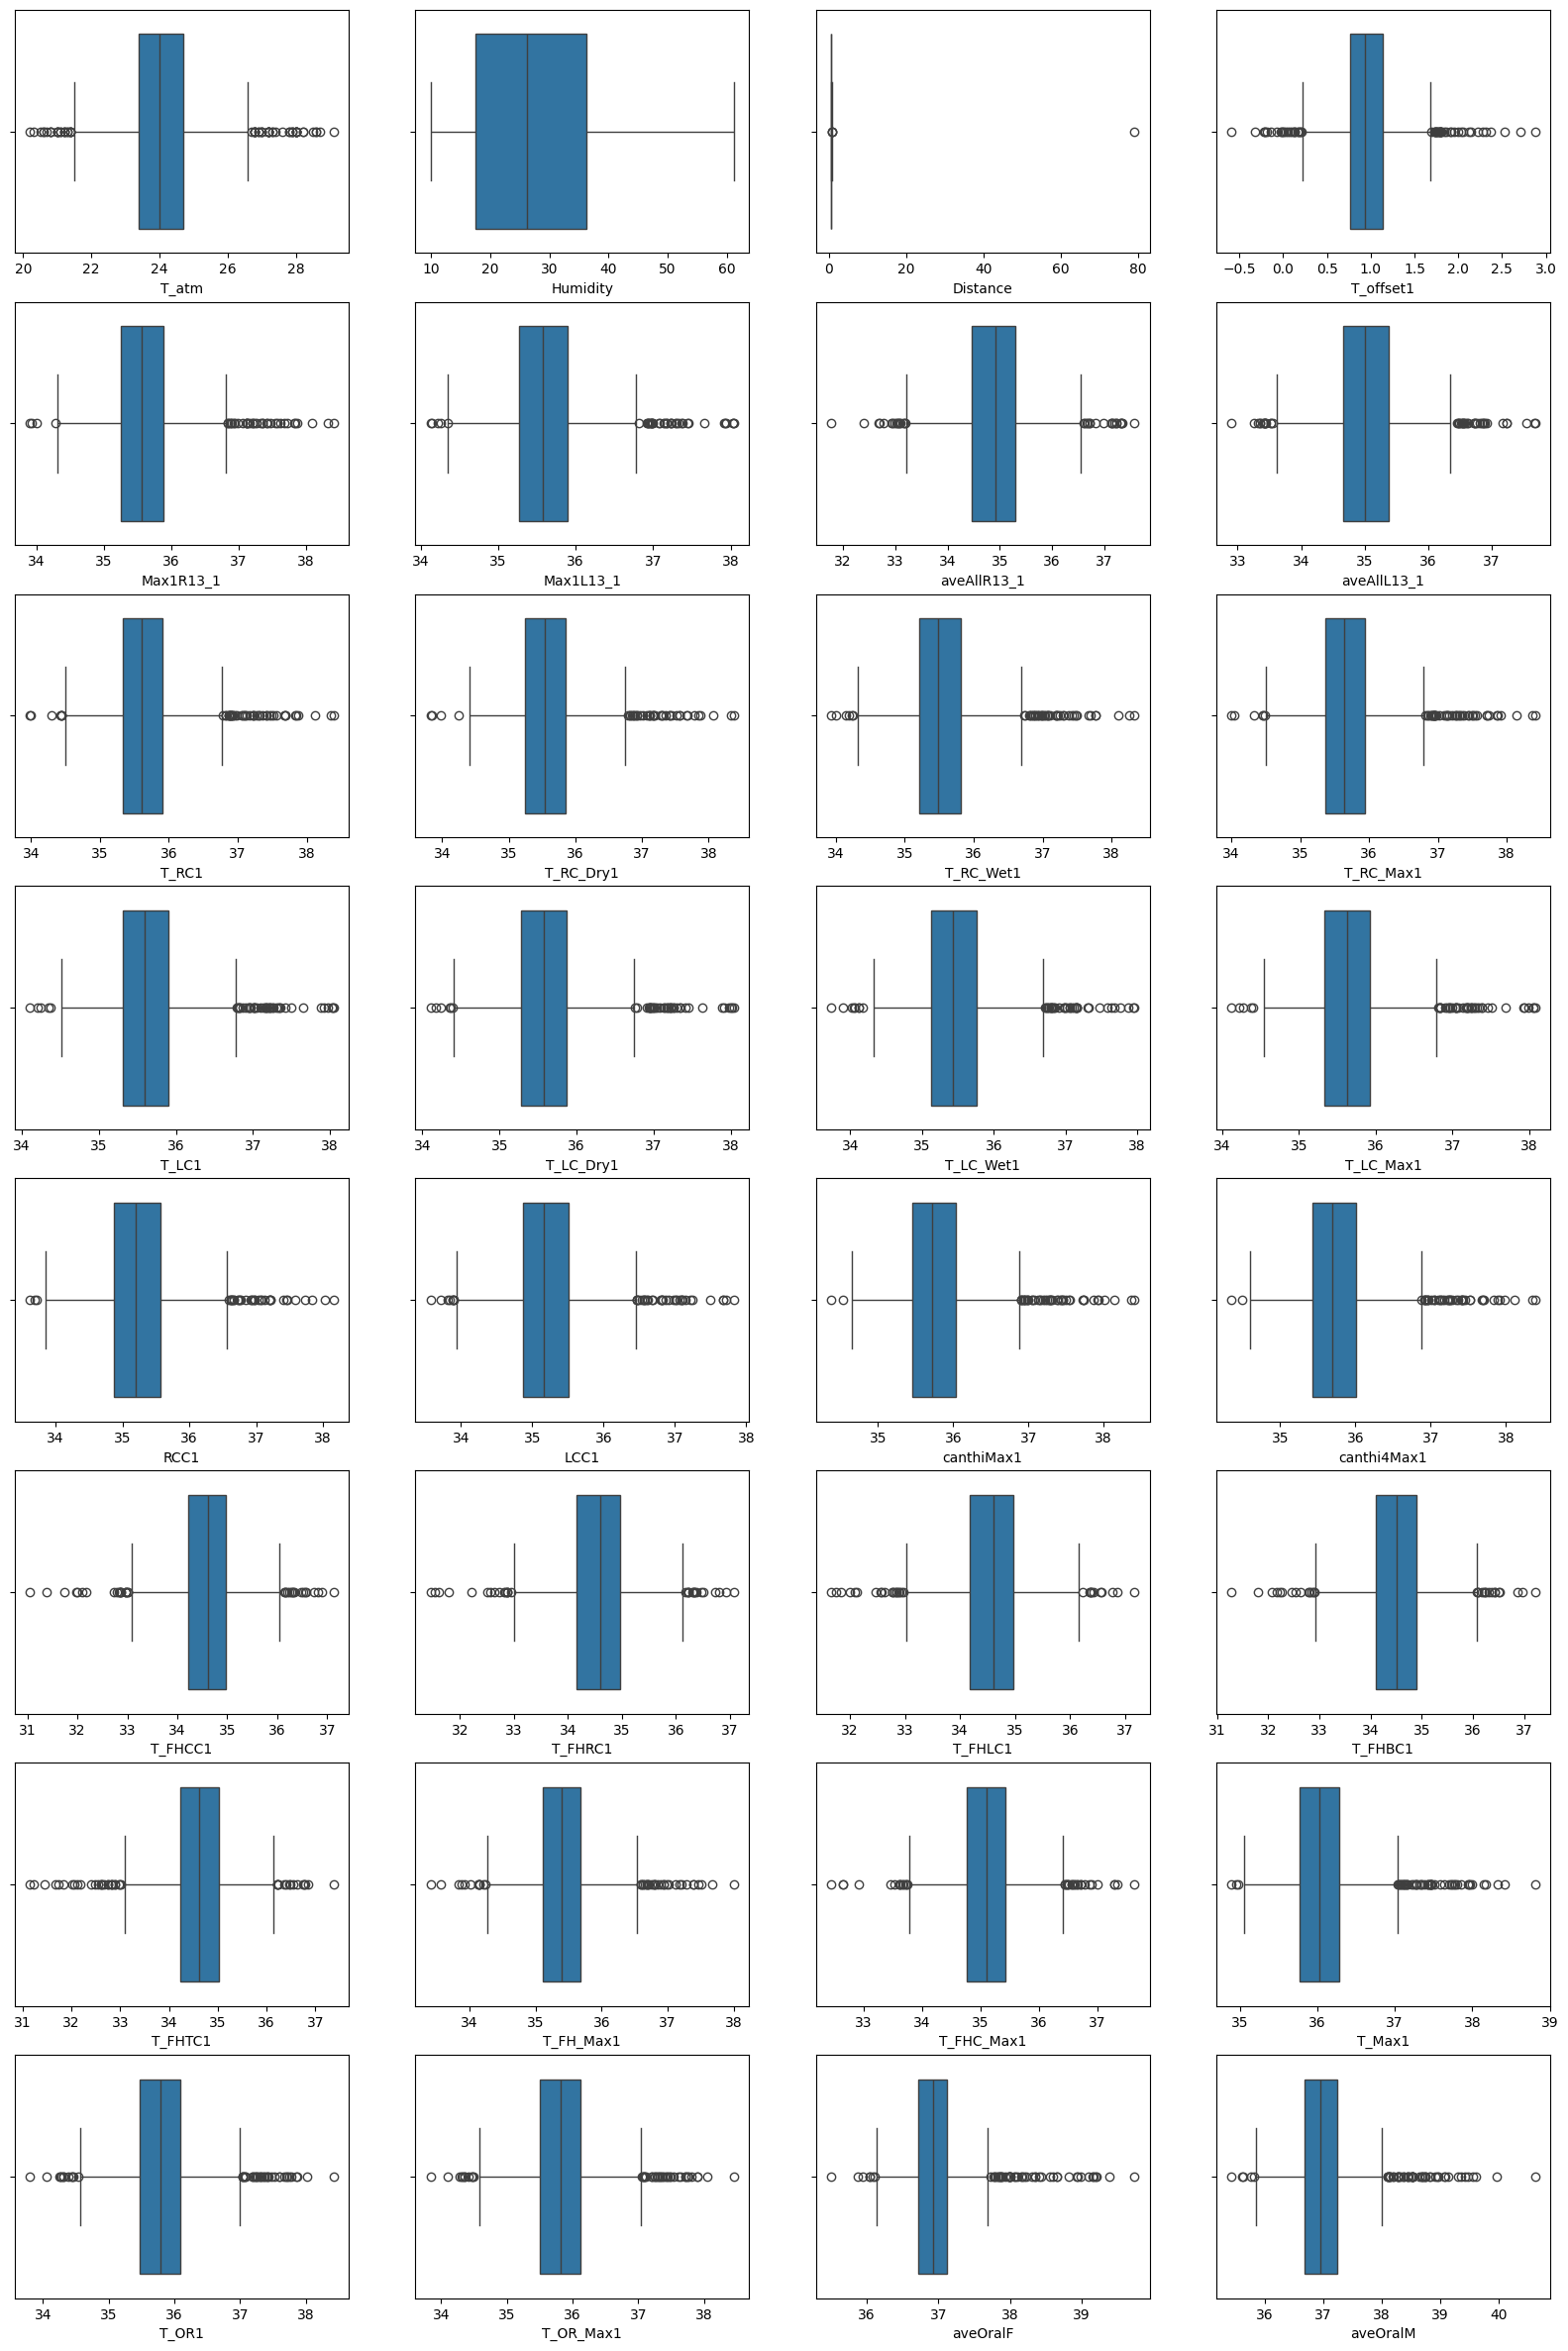

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(8,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  if i==0: continue
  sns.boxplot(data = numerical_df, x = column,ax = axes[(i-1)//4,(i-1)%4])

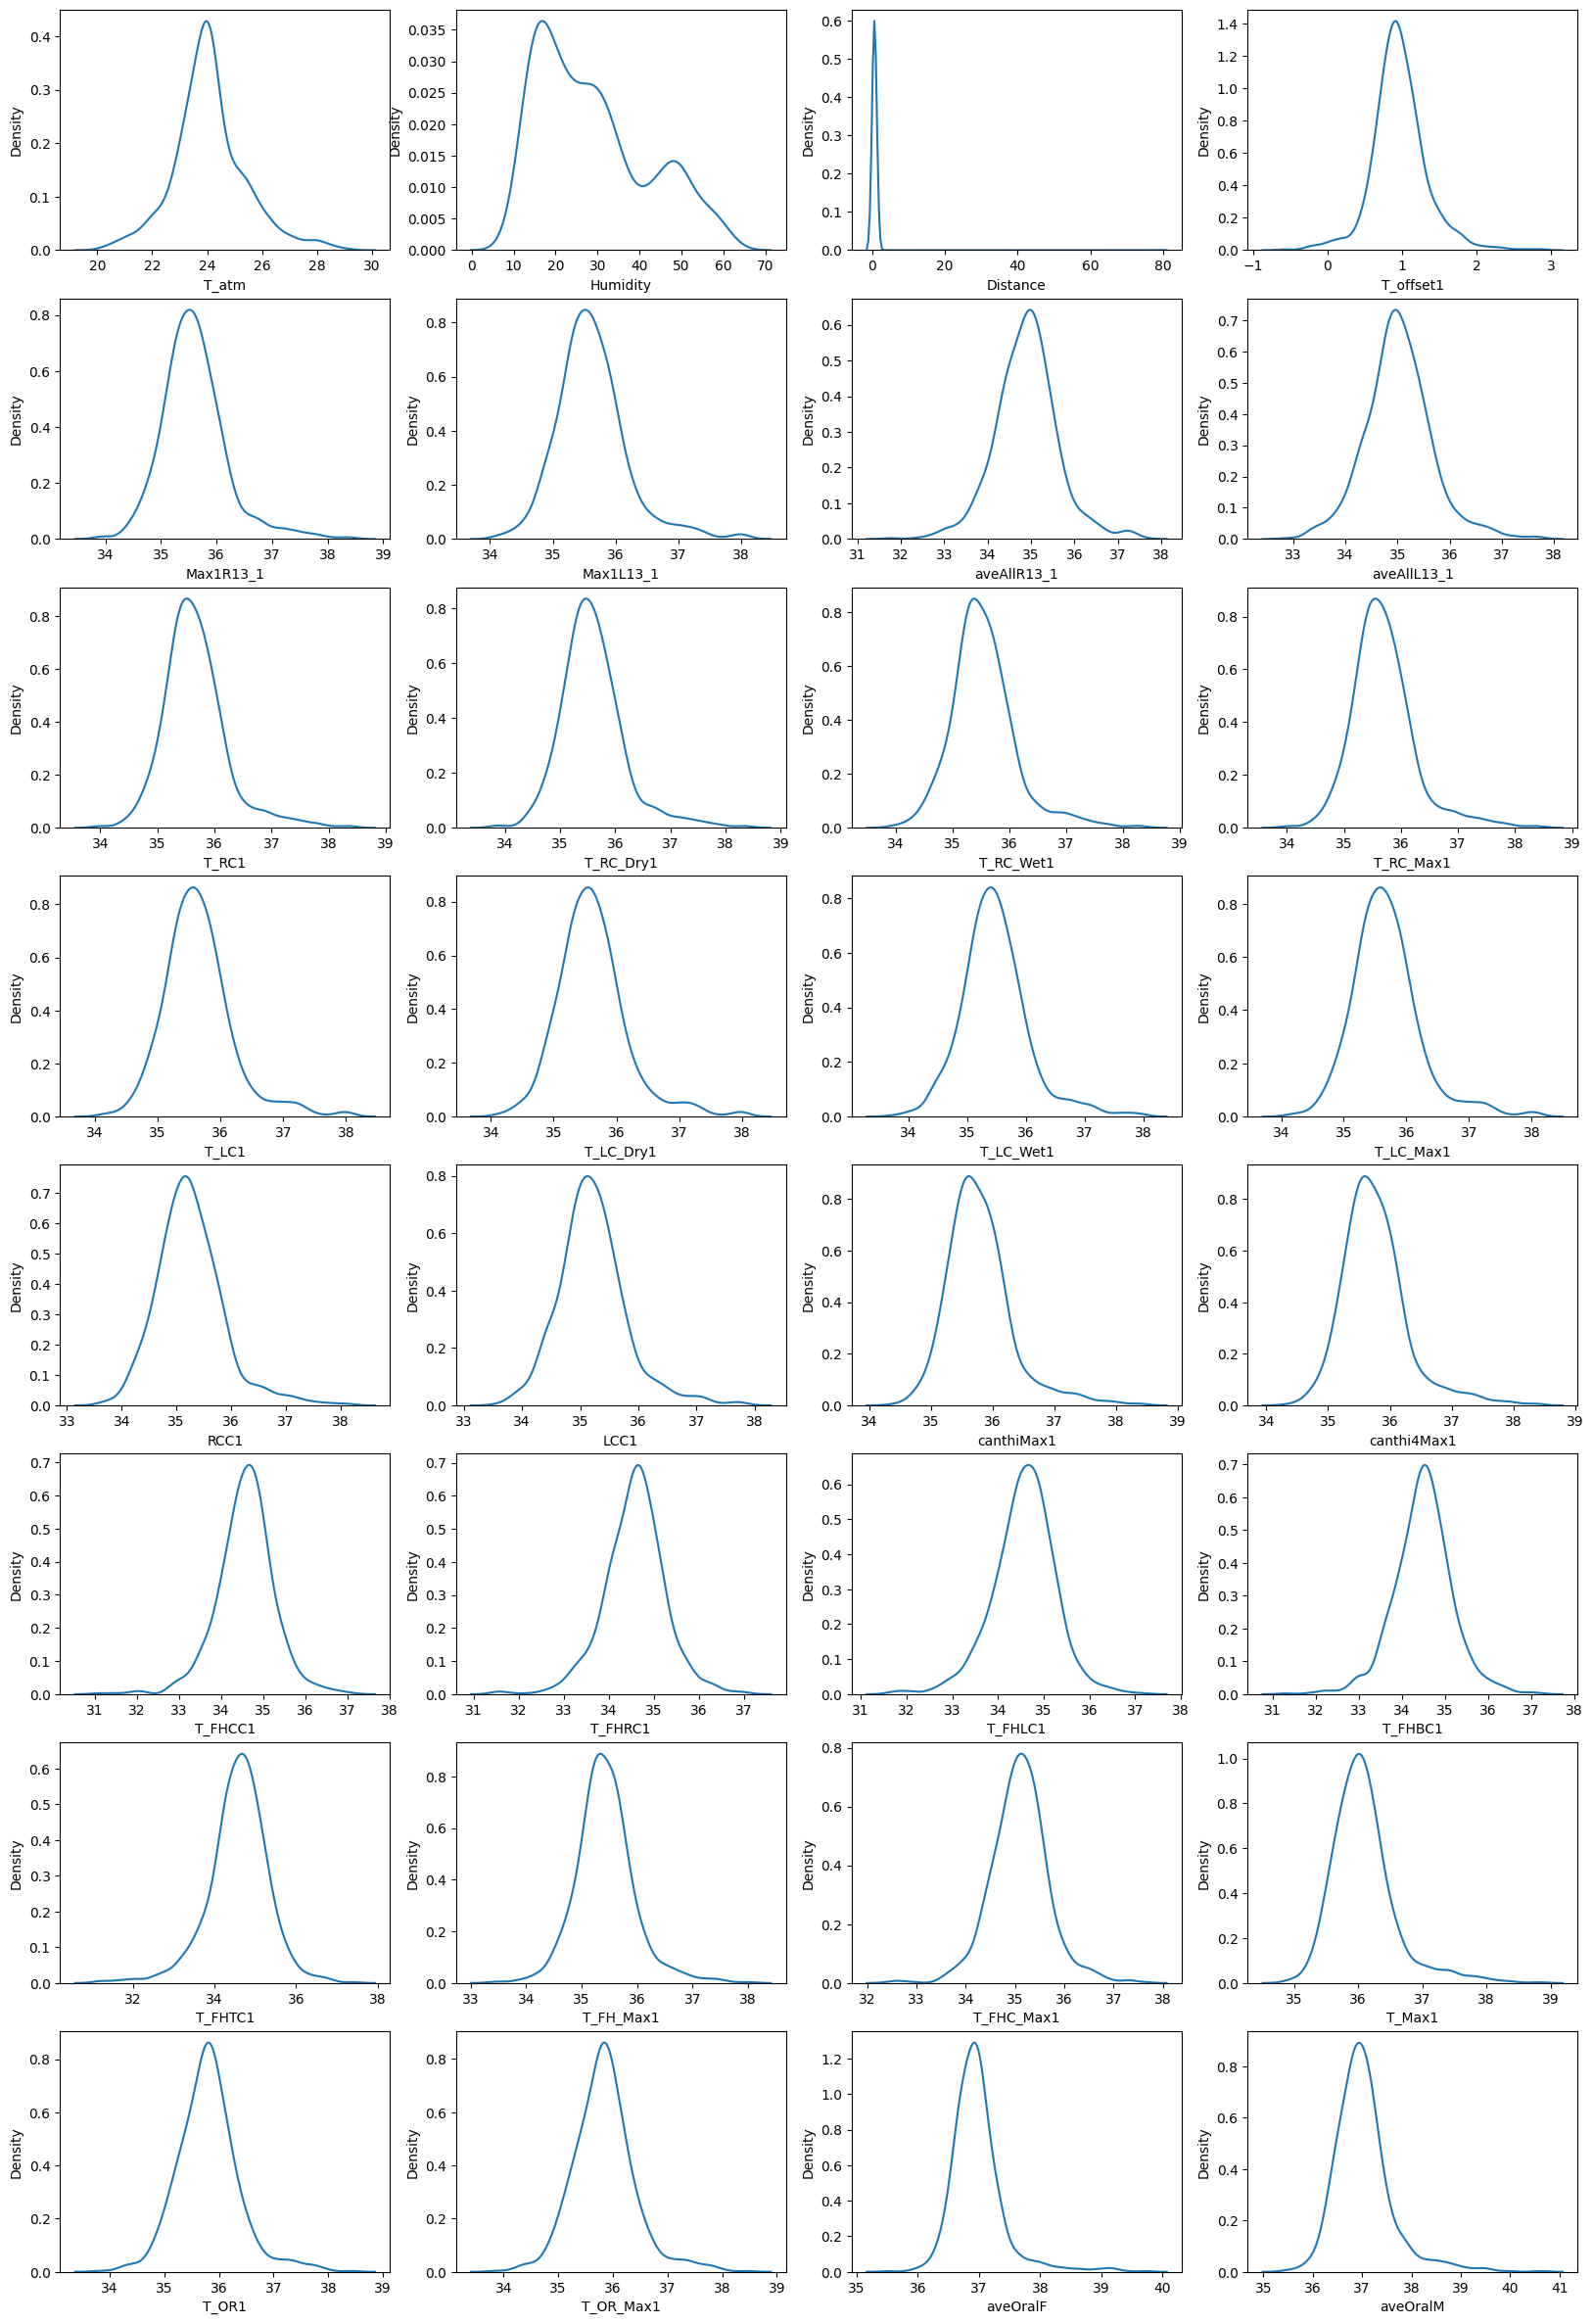

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(8,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  if i==0:continue
  i=i-1
  sns.kdeplot(data = numerical_df, x = column,ax = axes[i//4,i%4])

Humidity data is right-skewed ,so let's standarize them

In [9]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
trnf2 = PowerTransformer(method='yeo-johnson')

transformer = ColumnTransformer([
    ('trnf',trnf2,['Humidity']),
       ],remainder='passthrough')

numerical_df = pd.DataFrame(transformer.fit_transform(numerical_df),columns = ['Humidity','index', 'T_atm', 'Distance', 'T_offset1', 'Max1R13_1',
       'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1',
       'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1',
       'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1',
       'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1',
       'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralF', 'aveOralM'])


In [10]:
numerical_df.describe()

,Humidity,index,T_atm,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-5.882489e-16,458.726580,24.095207,0.737146,0.966147,35.599781,35.616831,34.894854,35.019171,35.663095,...,34.567719,34.490904,34.586251,35.424491,35.098431,36.087569,35.806164,35.838945,36.976143,37.028781
std,1.000545e+00,265.496778,1.321147,2.586731,0.364392,0.581024,0.554587,0.720241,0.637929,0.557746,...,0.687794,0.676968,0.736897,0.528922,0.584000,0.495710,0.565491,0.565612,0.437538,0.577912
min,-2.189170e+00,0.000000,20.200000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.500392,35.429644
25%,-8.586250e-01,229.250000,23.400000,0.600000,0.770000,35.245000,35.272500,34.461250,34.655625,35.335000,...,34.181250,34.095625,34.228125,35.115625,34.760000,35.775625,35.473125,35.498125,36.724969,36.677206
50%,4.870641e-02,458.500000,24.000000,0.620000,0.940000,35.552500,35.577500,34.917083,35.000000,35.603750,...,34.607500,34.508750,34.626250,35.392500,35.105000,36.028750,35.786250,35.822500,36.925229,36.956212
75%,7.452148e-01,687.750000,24.700000,0.700000,1.137500,35.877500,35.890000,35.300000,35.373750,35.911875,...,34.976250,34.889375,35.022500,35.686250,35.419375,36.279375,36.087500,36.120000,37.119943,37.242411
max,1.830402e+00,919.000000,29.100000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.733519,40.621254


In [11]:
numerical_df['index'] = numerical_df['index'].astype(int)

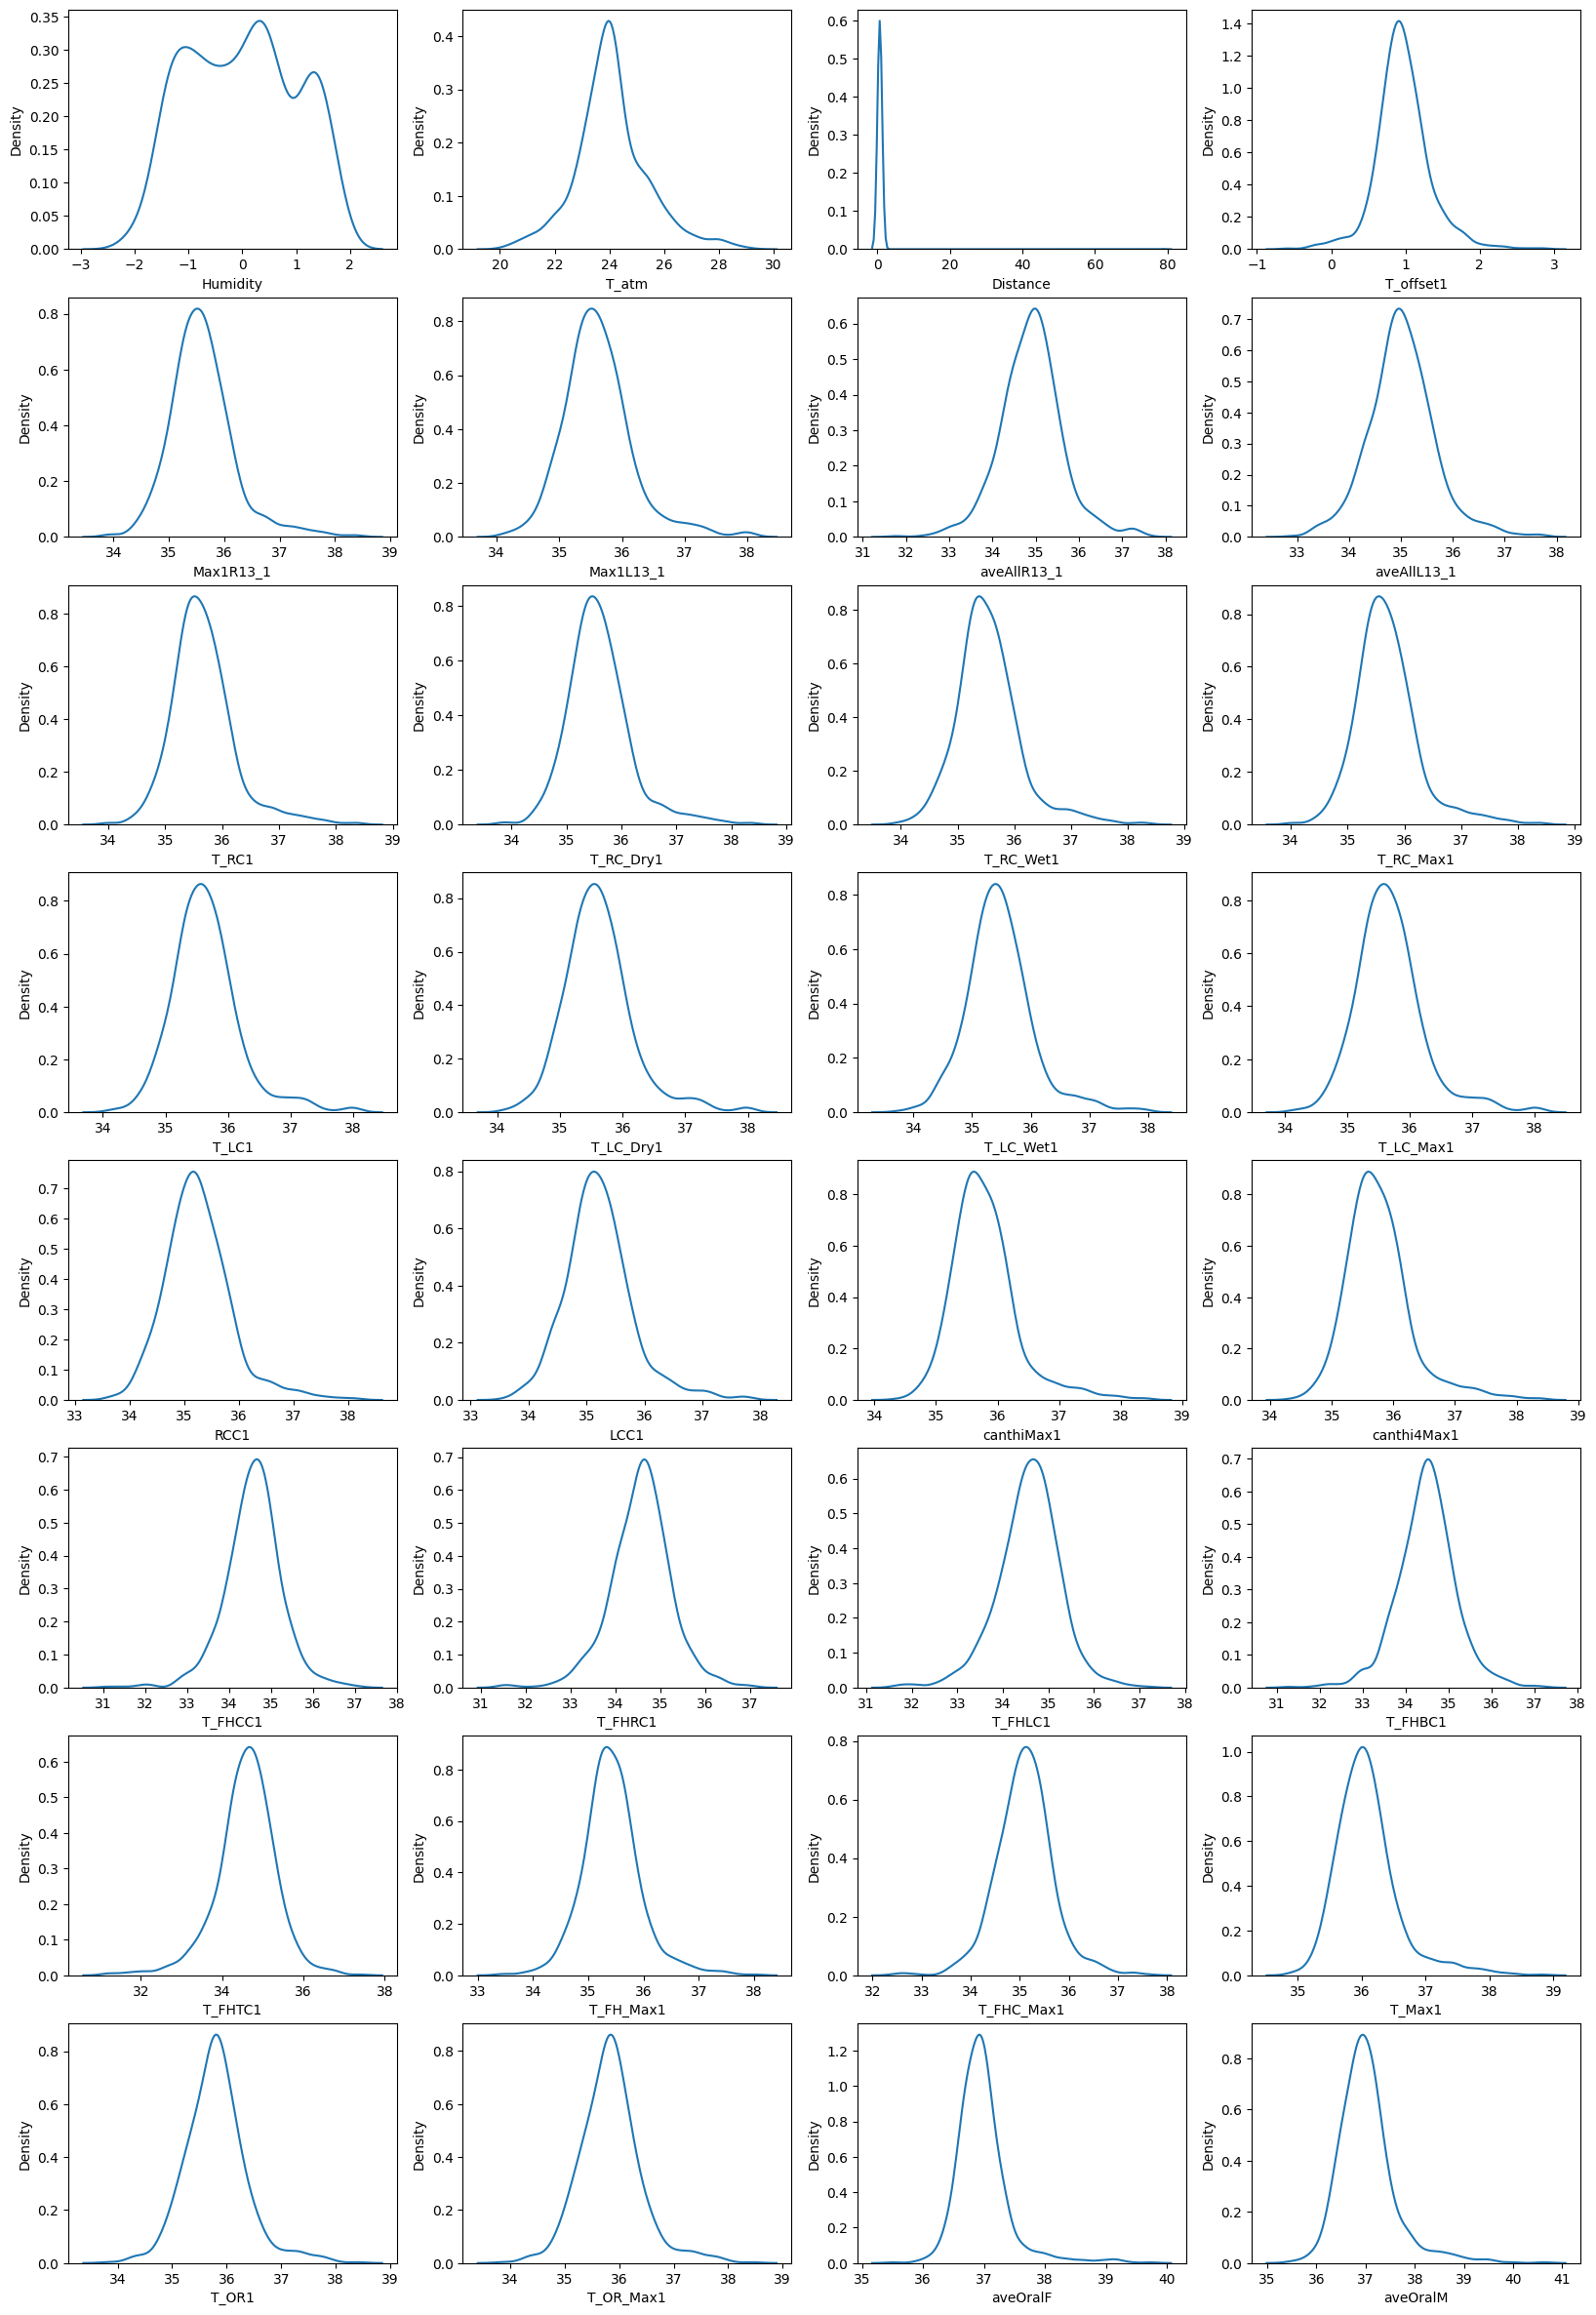

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(8,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  if i==1: continue
  if i>1: i = i-1
  sns.kdeplot(data = numerical_df, x = column,ax = axes[i//4,i%4])

In [12]:
pd.DataFrame(numerical_df.describe())

,Humidity,index,T_atm,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-5.882489e-16,458.726580,24.095207,0.737146,0.966147,35.599781,35.616831,34.894854,35.019171,35.663095,...,34.567719,34.490904,34.586251,35.424491,35.098431,36.087569,35.806164,35.838945,36.976143,37.028781
std,1.000545e+00,265.496778,1.321147,2.586731,0.364392,0.581024,0.554587,0.720241,0.637929,0.557746,...,0.687794,0.676968,0.736897,0.528922,0.584000,0.495710,0.565491,0.565612,0.437538,0.577912
min,-2.189170e+00,0.000000,20.200000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.500392,35.429644
25%,-8.586250e-01,229.250000,23.400000,0.600000,0.770000,35.245000,35.272500,34.461250,34.655625,35.335000,...,34.181250,34.095625,34.228125,35.115625,34.760000,35.775625,35.473125,35.498125,36.724969,36.677206
50%,4.870641e-02,458.500000,24.000000,0.620000,0.940000,35.552500,35.577500,34.917083,35.000000,35.603750,...,34.607500,34.508750,34.626250,35.392500,35.105000,36.028750,35.786250,35.822500,36.925229,36.956212
75%,7.452148e-01,687.750000,24.700000,0.700000,1.137500,35.877500,35.890000,35.300000,35.373750,35.911875,...,34.976250,34.889375,35.022500,35.686250,35.419375,36.279375,36.087500,36.120000,37.119943,37.242411
max,1.830402e+00,919.000000,29.100000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.733519,40.621254


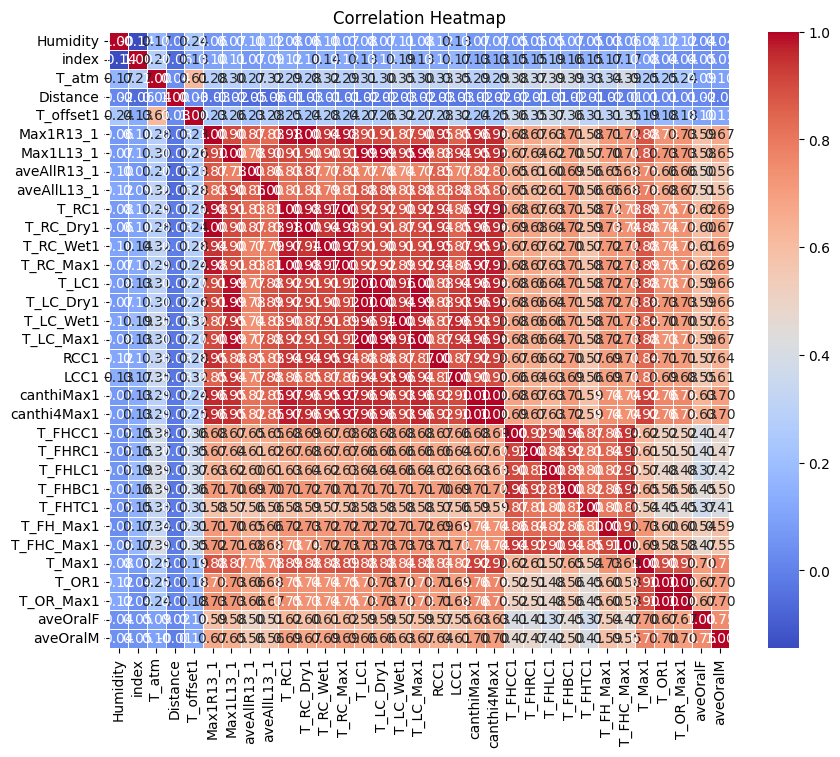

In [101]:

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## we see there are too much similarity b/w features 
### Applying PCA for new features

In [103]:
numerical_df.columns

Index(['Humidity', 'index', 'T_atm', 'Distance', 'T_offset1', 'Max1R13_1',
       'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1',
       'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1',
       'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1',
       'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1',
       'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralF', 'aveOralM'],
      dtype='object')

In [13]:
numerical_df_old = numerical_df[['Humidity', 'index', 'T_atm', 'Distance','T_offset1']]
numerical_df_output = numerical_df[['aveOralF', 'aveOralM']]
numerical_df_highly_correlated = numerical_df[['Max1R13_1',
       'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1',
       'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1',
       'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1']]
other = numerical_df[[ 'T_FHCC1',
       'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1']]
other2 = numerical_df[[
       'T_Max1', 'T_OR1', 'T_OR_Max1']]

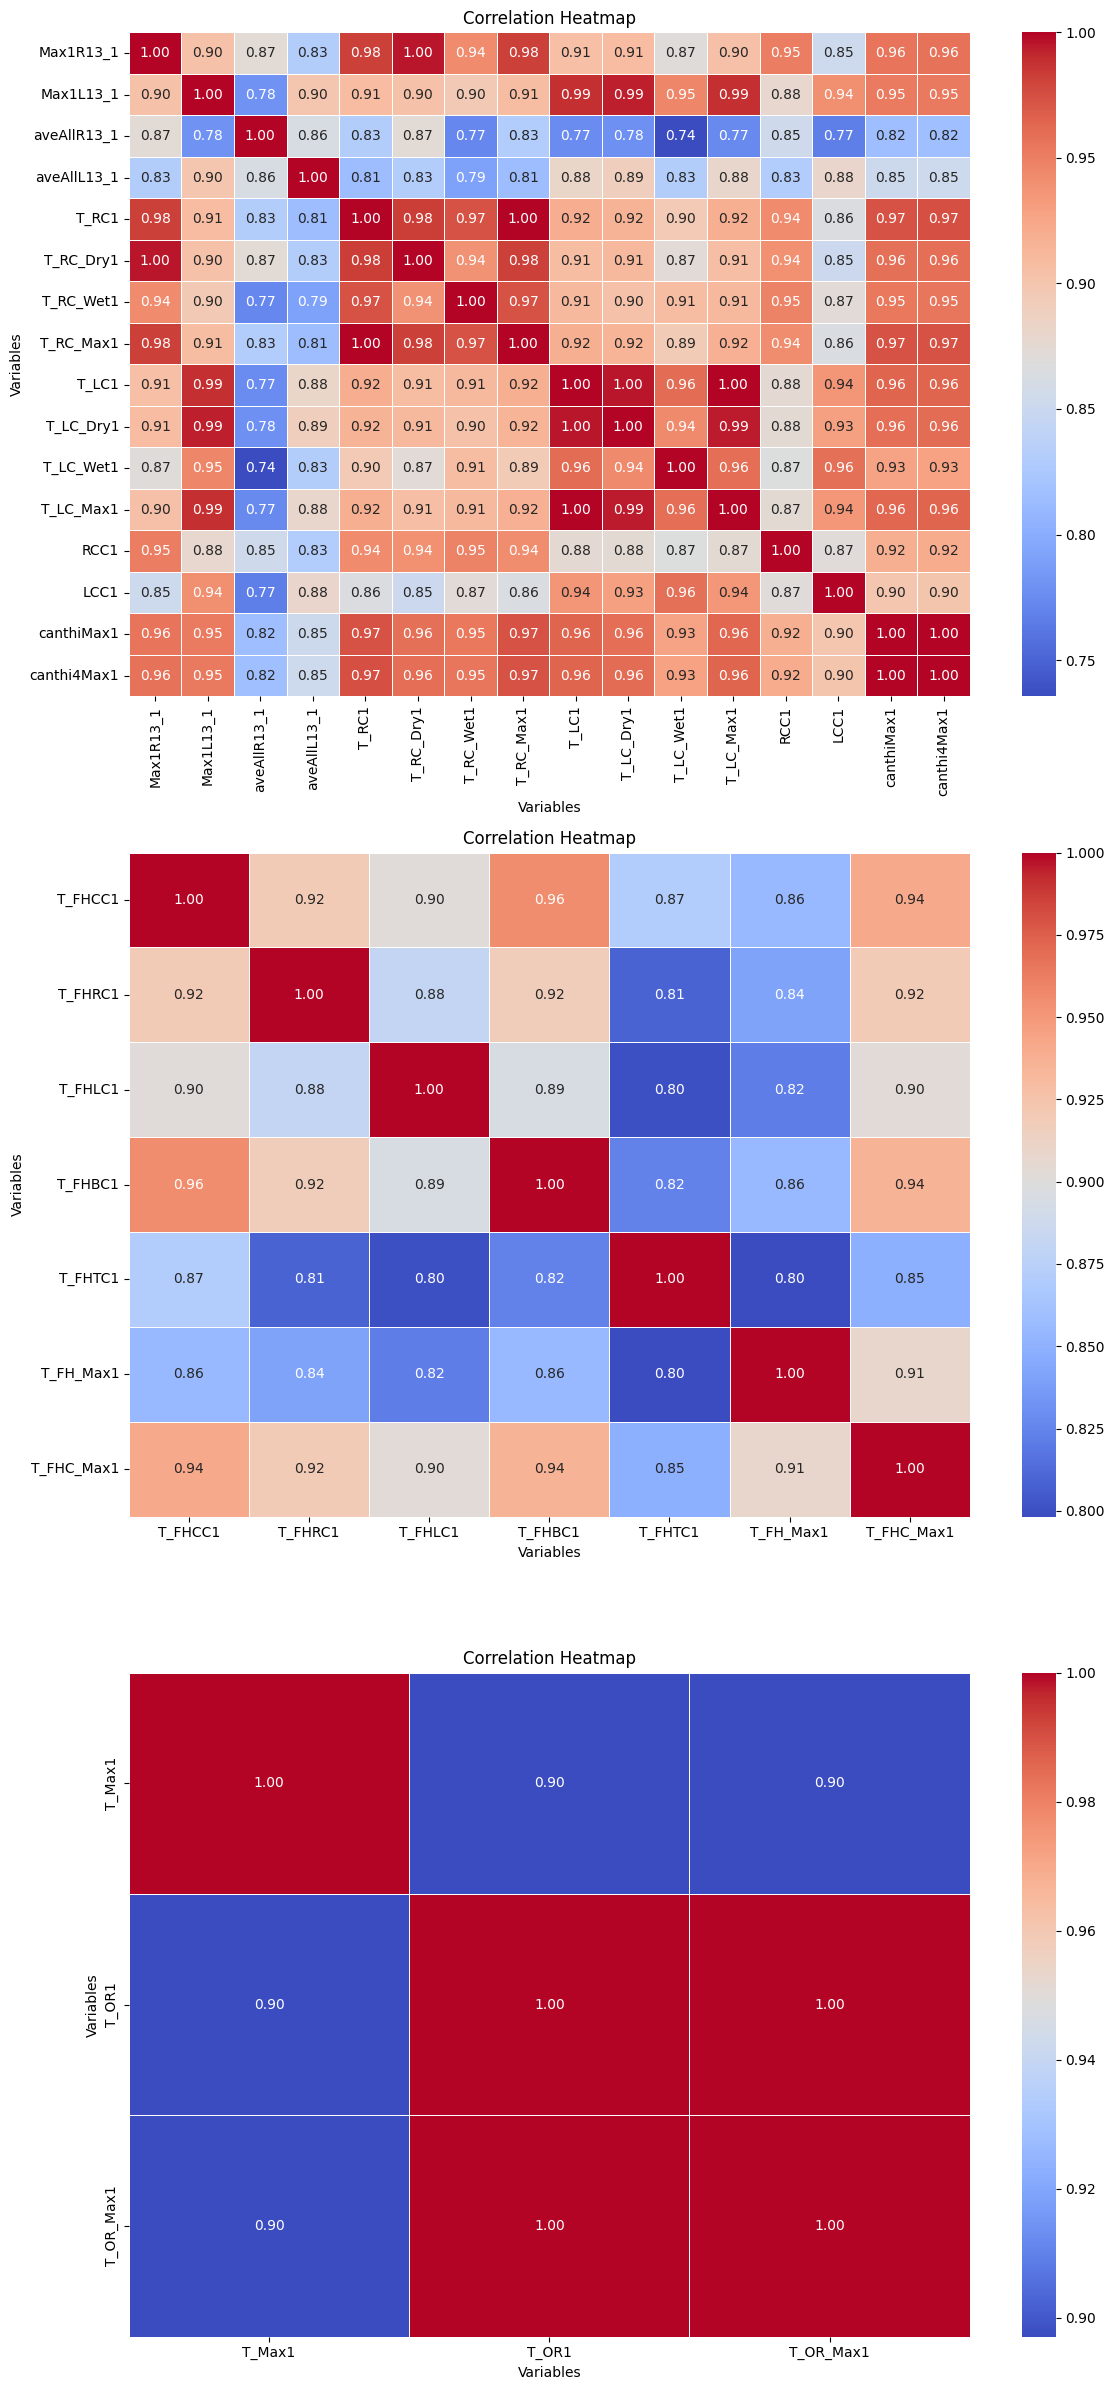

In [138]:
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

for i, col in enumerate([numerical_df_highly_correlated, other, other2]):
    # Calculate correlation matrix
    correlation_matrix = col.corr()

    # Create heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[i])
    axes[i].set_title('Correlation Heatmap')
    axes[i].set_ylabel('Variables')
    axes[i].set_xlabel('Variables')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.decomposition import PCA

# Define a function to perform PCA and extract first two components
def apply_pca(df, prefix):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)
    principal_df = pd.DataFrame(data=principal_components, columns=[f'{prefix}_feature1', f'{prefix}_feature2'])
    return principal_df

# Apply PCA on each DataFrame
pca_numerical_df_highly_correlated = apply_pca(numerical_df_highly_correlated, 'RCFC')
pca_other = apply_pca(other, 'FHCC')
pca_other2 = apply_pca(other2, 'TOR')

In [15]:
pca_numerical_df_highly_correlated.head(1)

,RCFC_feature1,RCFC_feature2
0,-2.014624,-0.076019


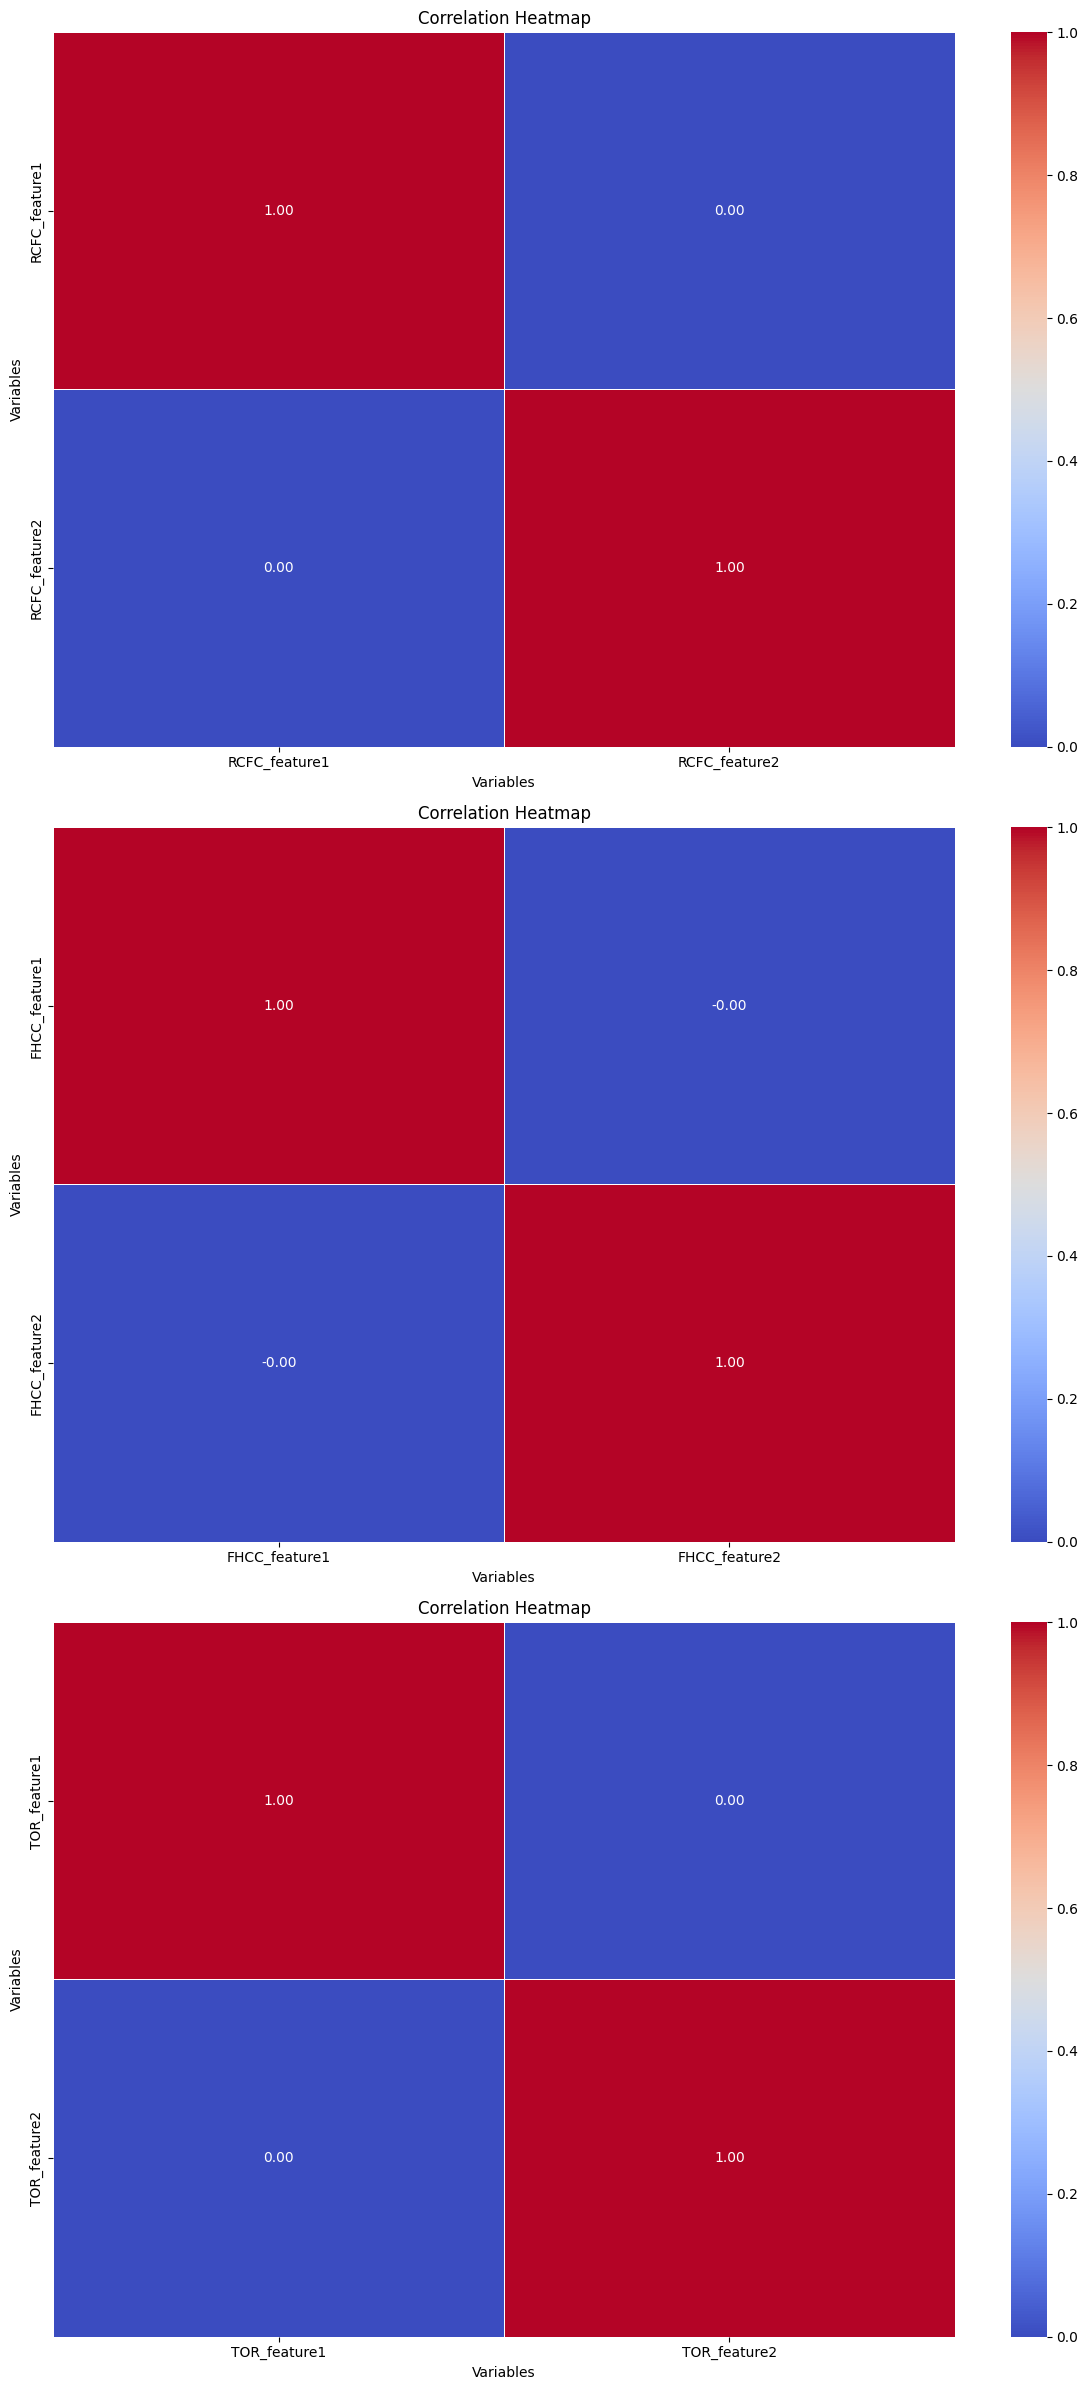

In [141]:
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

for i, col in enumerate([pca_numerical_df_highly_correlated, pca_other, pca_other2]):
    # Calculate correlation matrix
    correlation_matrix = col.corr()

    # Create heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[i])
    axes[i].set_title('Correlation Heatmap')
    axes[i].set_ylabel('Variables')
    axes[i].set_xlabel('Variables')

plt.tight_layout()
plt.show()

In [142]:
type(numerical_df_output)

pandas.core.frame.DataFrame

In [16]:
numerical_df = pd.concat([numerical_df_old, pca_numerical_df_highly_correlated, pca_other, pca_other2, numerical_df_output], axis=1)


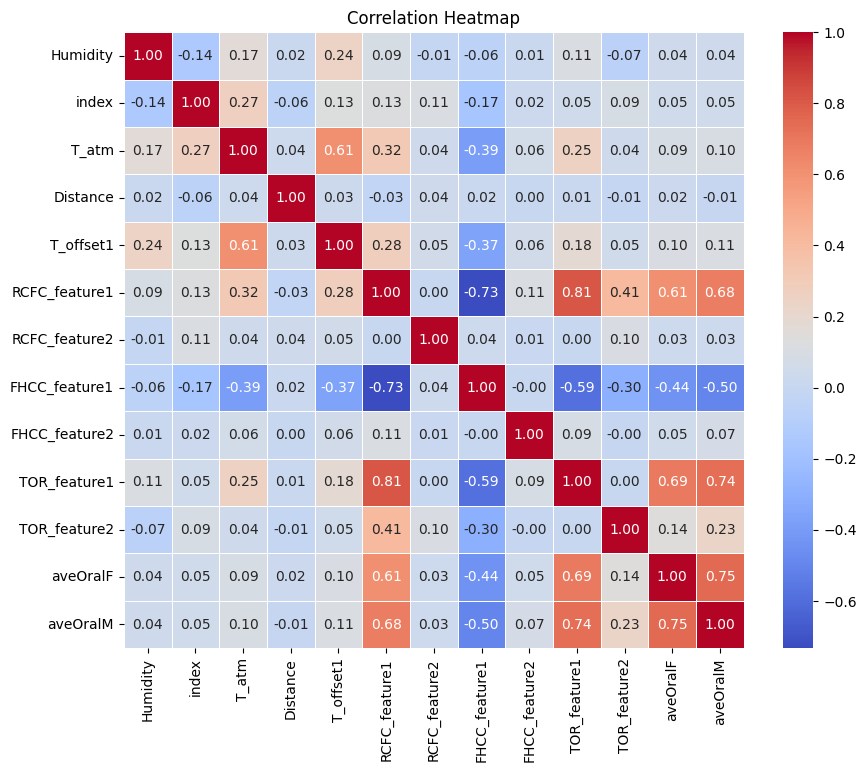

In [144]:


# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Preprocessing the Categorical dataset


In [17]:
categorical_df = df[['Gender','Age','Ethnicity']].reset_index()

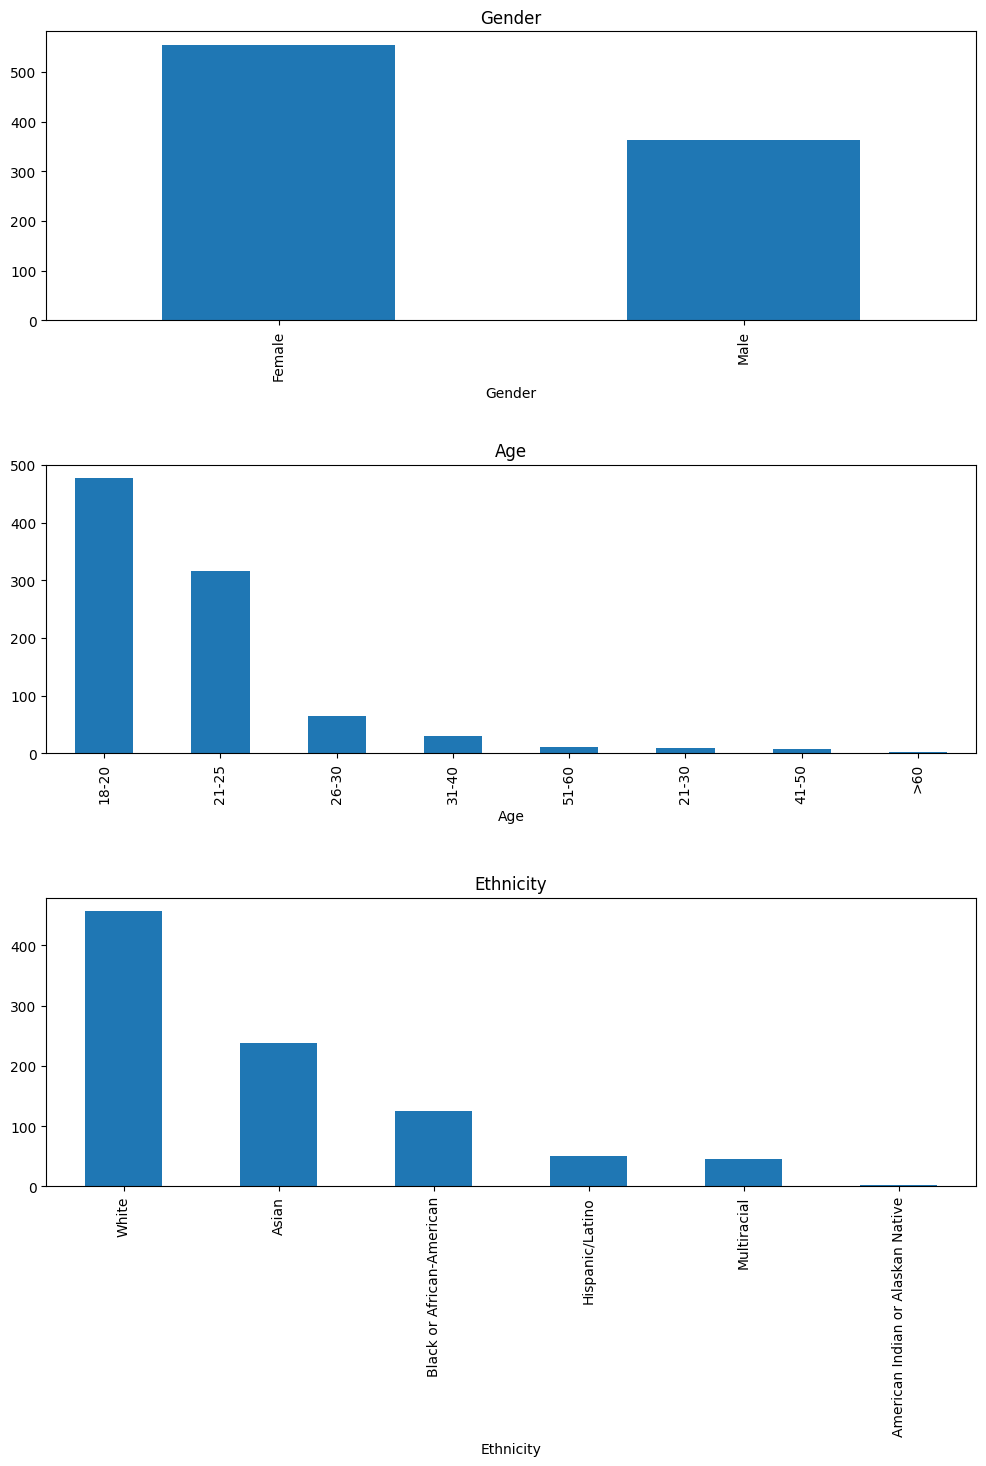

In [150]:
fig,axes = plt.subplots(3,1,figsize = (12,15))
plt.subplots_adjust(hspace=0.5)
for i,column in enumerate(categorical_df.columns):
  if i==0: continue
  i = i-1
  ax = axes[i]
  categorical_df[column].value_counts().plot(kind='bar',ax=ax)
  ax.set_title(column)

In [18]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
transformer2 = ColumnTransformer(
    [
        ('ordinalencoding',OrdinalEncoder(),['Age']),
        ('onehotencoding',OneHotEncoder(),['Ethnicity','Gender'])
     
     ],
    remainder='passthrough'
)

In [152]:
categorical_df.columns

Index(['index', 'Gender', 'Age', 'Ethnicity'], dtype='object')

In [19]:
cate_col = ['Age', 'American Indian or Alaskan Native',  'Asian',  'Black or African-American',  'Hispanic/Latino',  'Multiracial',  'White',  'Female',  'Male','index']
categorical_df = pd.DataFrame(transformer2.fit_transform(categorical_df),columns = cate_col)

In [20]:
categorical_df.tail()

,Age,American Indian or Alaskan Native,Asian,Black or African-American,Hispanic/Latino,Multiracial,White,Female,Male,index
913,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,915.0
914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,916.0
915,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,917.0
916,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,918.0
917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,919.0


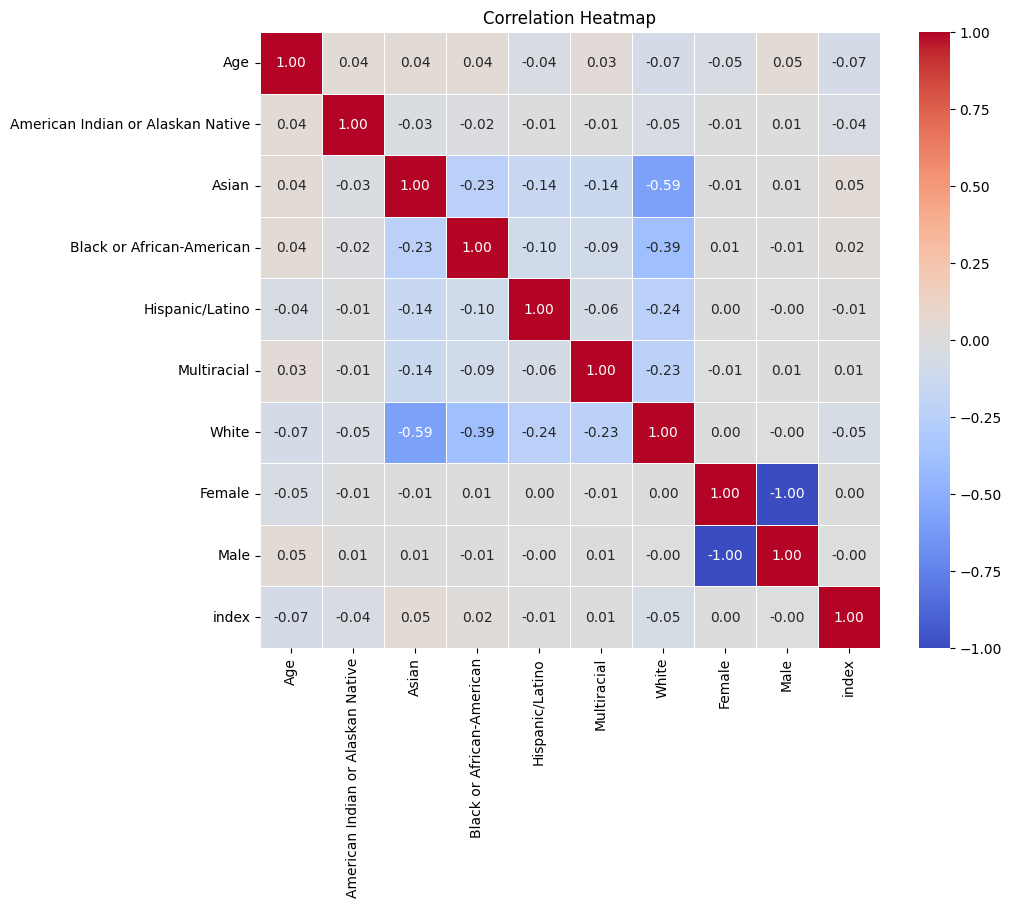

In [156]:

# Calculate correlation matrix
correlation_matrix = categorical_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Part-b

In [21]:
dataset = pd.concat([numerical_df,categorical_df],axis=1)
dataset = dataset.drop(columns=['index'],axis=1)

In [22]:
dataset.describe()

,Humidity,T_atm,Distance,T_offset1,RCFC_feature1,RCFC_feature2,FHCC_feature1,FHCC_feature2,TOR_feature1,TOR_feature2,...,aveOralM,Age,American Indian or Alaskan Native,Asian,Black or African-American,Hispanic/Latino,Multiracial,White,Female,Male
count,9.180000e+02,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-5.882489e-16,24.095207,0.737146,0.966147,-2.631640e-15,-7.906529e-15,2.740001e-15,-1.586240e-15,-4.442827e-15,2.093702e-15,...,37.028781,0.832244,0.002179,0.259259,0.136166,0.055556,0.050109,0.496732,0.603486,0.396514
std,1.000545e+00,1.321147,2.586731,0.364392,2.204931e+00,4.481693e-01,1.643802e+00,3.497299e-01,9.215673e-01,1.899054e-01,...,0.577912,1.255811,0.046651,0.438467,0.343151,0.229186,0.218289,0.500262,0.489440,0.489440
min,-2.189170e+00,20.200000,0.540000,-0.590000,-6.044829e+00,-1.126942e+00,-6.874826e+00,-8.936912e-01,-2.792980e+00,-2.903310e-01,...,35.429644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.586250e-01,23.400000,0.600000,0.770000,-1.278551e+00,-3.071542e-01,-8.814832e-01,-1.838509e-01,-5.660335e-01,-1.352582e-01,...,36.677206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.870641e-02,24.000000,0.620000,0.940000,-2.546685e-01,-3.292778e-02,-2.672893e-02,-4.153507e-02,-6.179569e-02,-4.877733e-02,...,36.956212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.452148e-01,24.700000,0.700000,1.137500,1.027326e+00,2.581797e-01,9.315839e-01,1.073292e-01,4.519012e-01,9.762947e-02,...,37.242411,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.830402e+00,29.100000,79.000000,2.875000,1.026700e+01,2.266551e+00,7.696100e+00,2.212473e+00,4.565450e+00,1.167887e+00,...,40.621254,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dataset.columns

Index(['Humidity', 'T_atm', 'Distance', 'T_offset1', 'RCFC_feature1',
       'RCFC_feature2', 'FHCC_feature1', 'FHCC_feature2', 'TOR_feature1',
       'TOR_feature2', 'aveOralF', 'aveOralM', 'Age',
       'American Indian or Alaskan Native', 'Asian',
       'Black or African-American', 'Hispanic/Latino', 'Multiracial', 'White',
       'Female', 'Male'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test ,y_train,y_test = train_test_split(dataset.drop(['aveOralF','aveOralM'],axis=1).values,dataset[['aveOralF','aveOralM']].values,train_size=0.8,random_state=0)

## Standard Scaling of training the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
import numpy as np
np.mean(y_test[:,1])

37.072510325337745

In [134]:
import numpy as np
class LinearRegresssion():


    def __init__(self, learning_rate=0.000001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.theta_best=None
        
        

    def train(self, X, y):
        # print("We started")
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # print("No error")
        for _ in range(self.epochs):
            try:
                y_pred = self.predict(X)
                error = y-y_pred
                # print(error.shape)
                gradient = -(2 *(X.T).dot(error))/n_samples 
                bias_sep = -2 *np.sum(error)/n_samples

                self.weights -= self.learning_rate * gradient
                self.bias -=self.learning_rate*bias_sep

            except Exception as e:
                print(e)
        # print(self.bias)
        return self

    def predict(self, X):
        return X.dot(self.weights) +self.bias

    def pseudo_train(self,x,y):
        X = np.c_[np.ones((x.shape[0], 1)), x]
        X_transpose = np.transpose(X)
        X_transpose_X = np.dot(X_transpose, X)
        X_transpose_y = np.dot(X_transpose, y)
         # Append a column of ones to x for bias
        try:
            self.theta_best = np.linalg.solve(X_transpose_X, X_transpose_y)
            return self.theta_best
        except np.linalg.LinAlgError:
            return None
    
    def pseudo_predict(self,x):
            X = np.c_[np.ones((x.shape[0], 1)), x]
            predictions = np.dot(X, self.theta_best)
            return predictions
    
    def r_squared_error(self,y_pred=None,y_true=None):
        # print(np.mean(y_true))
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        # print(y_true.shape ,np.mean(y_true))
        return 1 - (ss_res / ss_tot)
    
    def root_mean_square_error(self,y_pred=None,y_true=None):
        return np.sqrt(np.mean((y_true-y_pred)**2))



## Average Oral Temperature

In [150]:
from tqdm import tqdm 
from sklearn.metrics import r2_score,root_mean_squared_error
residual_data = []
for i in  range(100,5000,100):
    lr1 = LinearRegresssion(learning_rate=0.30,epochs=i)
    lr1.train(x_train,y_train[:,0])
    y_pred = lr1.predict(x_test)
    r_error=(lr1.r_squared_error(y_pred=y_pred,y_true=y_test[:,0]))
    rmse_error=(root_mean_squared_error(y_true=y_test[:,0],y_pred=y_pred))
    residual_data.append([i, r_error, rmse_error])
    
residual = pd.DataFrame(residual_data,columns=['learning_rate','r_square_Error','rmse_Error'])

In [151]:
residual.tail(1)

,learning_rate,r_square_Error,rmse_Error
48,4900,0.455319,0.303568


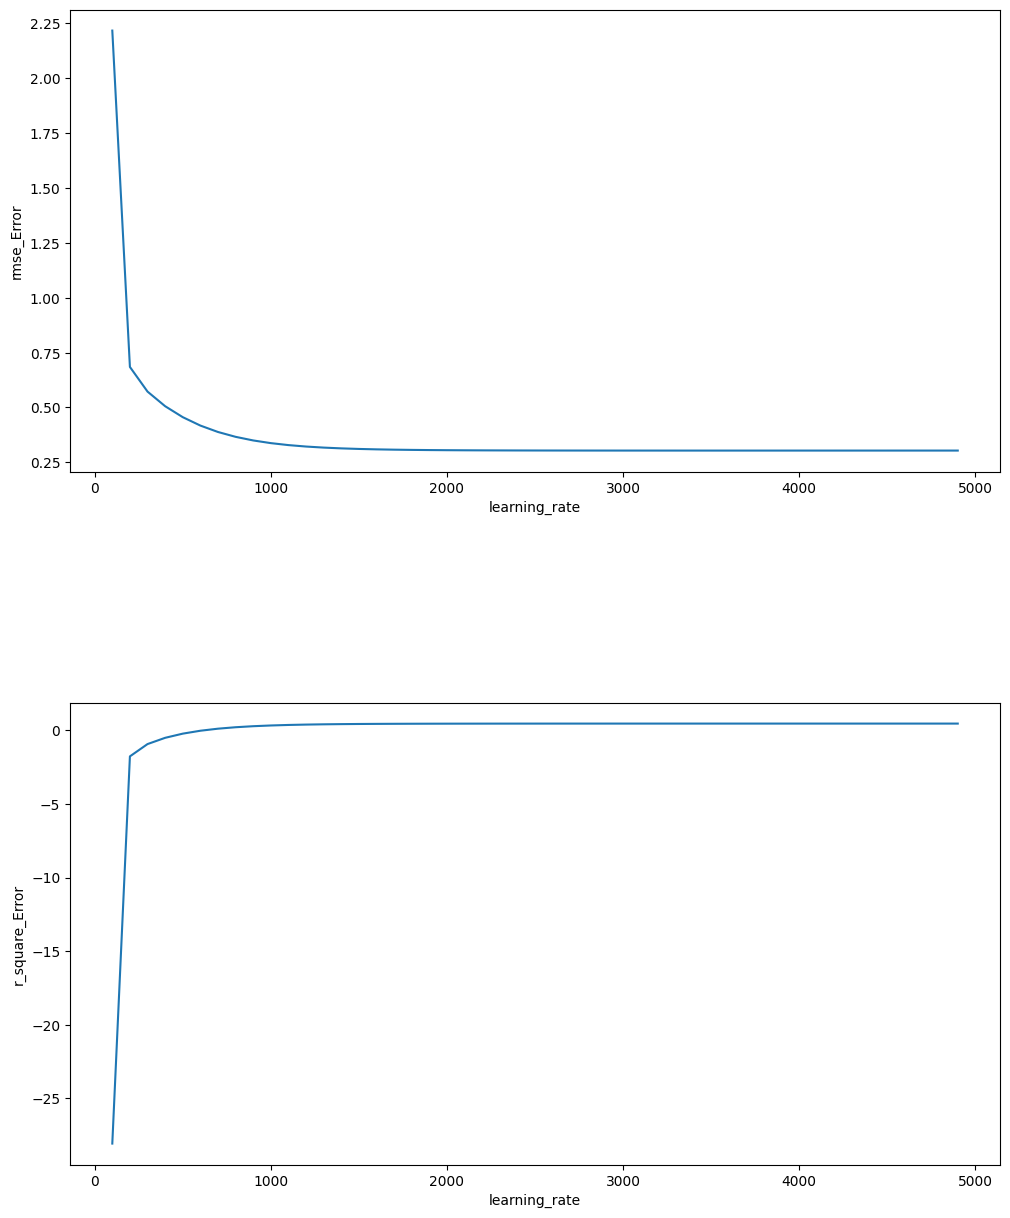

In [152]:
    
fig,axes = plt.subplots(2,1,figsize = (12,15))
plt.subplots_adjust(hspace=0.5)
for i,column in enumerate(residual.columns):
  if i==0: continue
  i = i-1
  ax = axes[i]
  sns.lineplot(data = residual,x= 'learning_rate',y=column,ax=axes[i-1])
#   categorical_df[column].value_counts().plot(kind='bar',ax=ax)
#   ax.set_title(column)


#### Using Psudo regressor

In [145]:
from tqdm import tqdm 
from sklearn.metrics import r2_score,root_mean_squared_error
residual_data = []
lr1 = LinearRegresssion()
lr1.pseudo_train(x_train,y_train[:,0])
y_pred = lr1.pseudo_predict(x_test)
r_error=(lr1.r_squared_error(y_pred=y_pred,y_true=y_test[:,0]))
rmse_error=(root_mean_squared_error(y_true=y_test[:,0],y_pred=y_pred))
residual_data.append([0, r_error, rmse_error])
residual_data

[[0, 0.45499904223077037, 0.30365682160452856]]

## Average thermal images

In [103]:
from tqdm import tqdm 
from sklearn.metrics import r2_score,root_mean_squared_error
residual_data = []
for i in  range(100,5000,100):
    lr1 = LinearRegresssion(learning_rate=0.30,epochs=i)
    lr1.train(x_train,y_train[:,1])
    y_pred = lr1.predict(x_test)
    r_error=(lr1.r_squared_error(y_pred=y_pred,y_true=y_test[:,1]))
    rmse_error=(root_mean_squared_error(y_true=y_test[:,1],y_pred=y_pred))
    residual_data.append([i, r_error, rmse_error])
    
residual = pd.DataFrame(residual_data,columns=['learning_rate','r_square_Error','rmse_Error'])

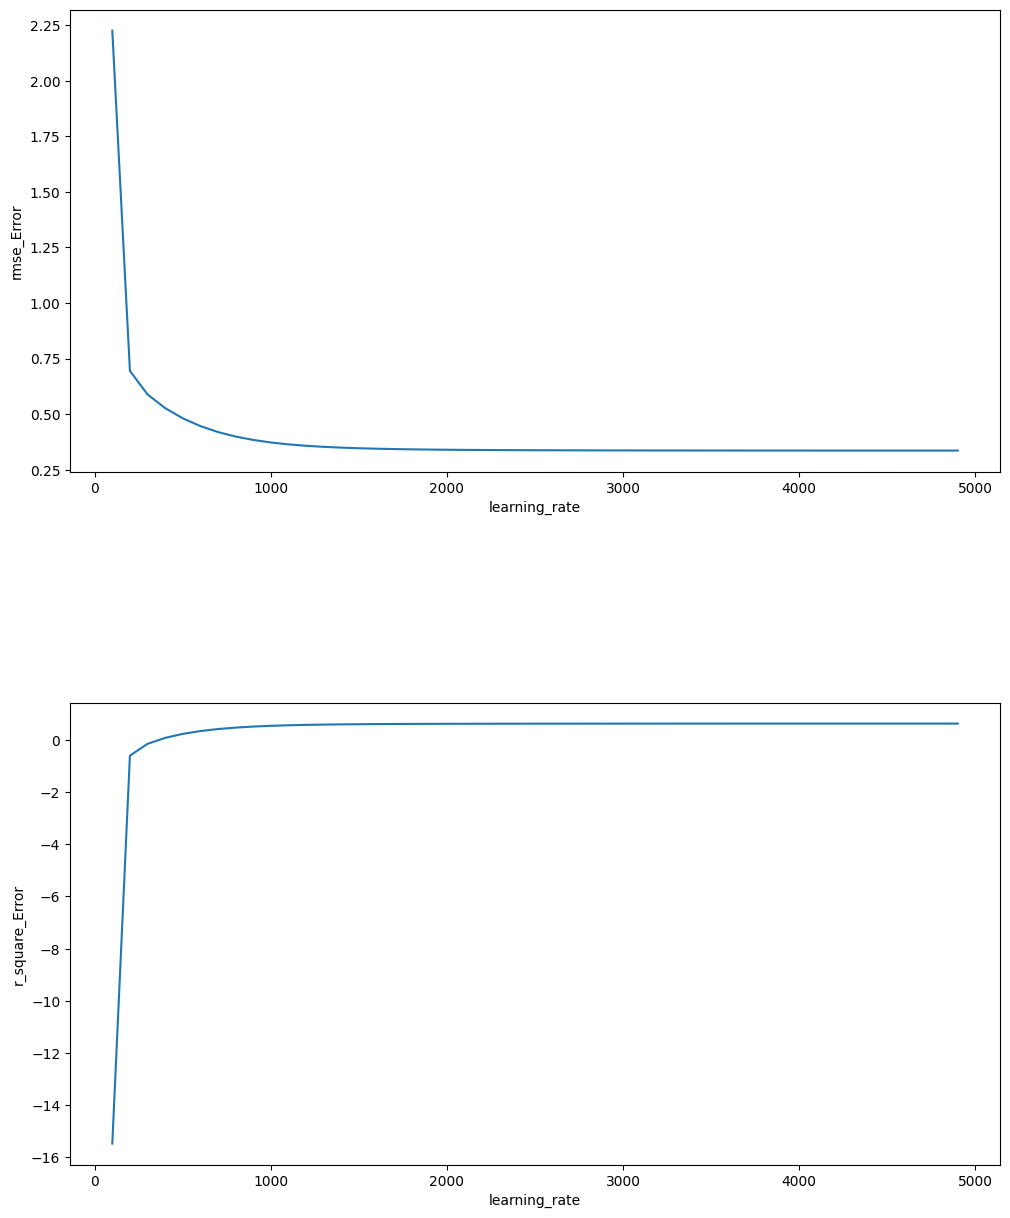

In [104]:
fig,axes = plt.subplots(2,1,figsize = (12,15))
plt.subplots_adjust(hspace=0.5)
for i,column in enumerate(residual.columns):
  if i==0: continue
  i = i-1
  ax = axes[i]
  sns.lineplot(data = residual,x= 'learning_rate',y=column,ax=axes[i-1])
#   categorical_df[column].value_counts().plot(kind='bar',ax=ax)
#   ax.set_title(column)

#### Using psudo regressor

In [146]:
from tqdm import tqdm 
from sklearn.metrics import r2_score,root_mean_squared_error
residual_data = []
lr1 = LinearRegresssion()
lr1.pseudo_train(x_train,y_train[:,1])
y_pred = lr1.pseudo_predict(x_test)
r_error=(lr1.r_squared_error(y_pred=y_pred,y_true=y_test[:,1]))
rmse_error=(root_mean_squared_error(y_true=y_test[:,1],y_pred=y_pred))
residual_data.append([0, r_error, rmse_error])
residual_data

[[0, 0.6256208133152259, 0.3356815579337681]]

## Part-C

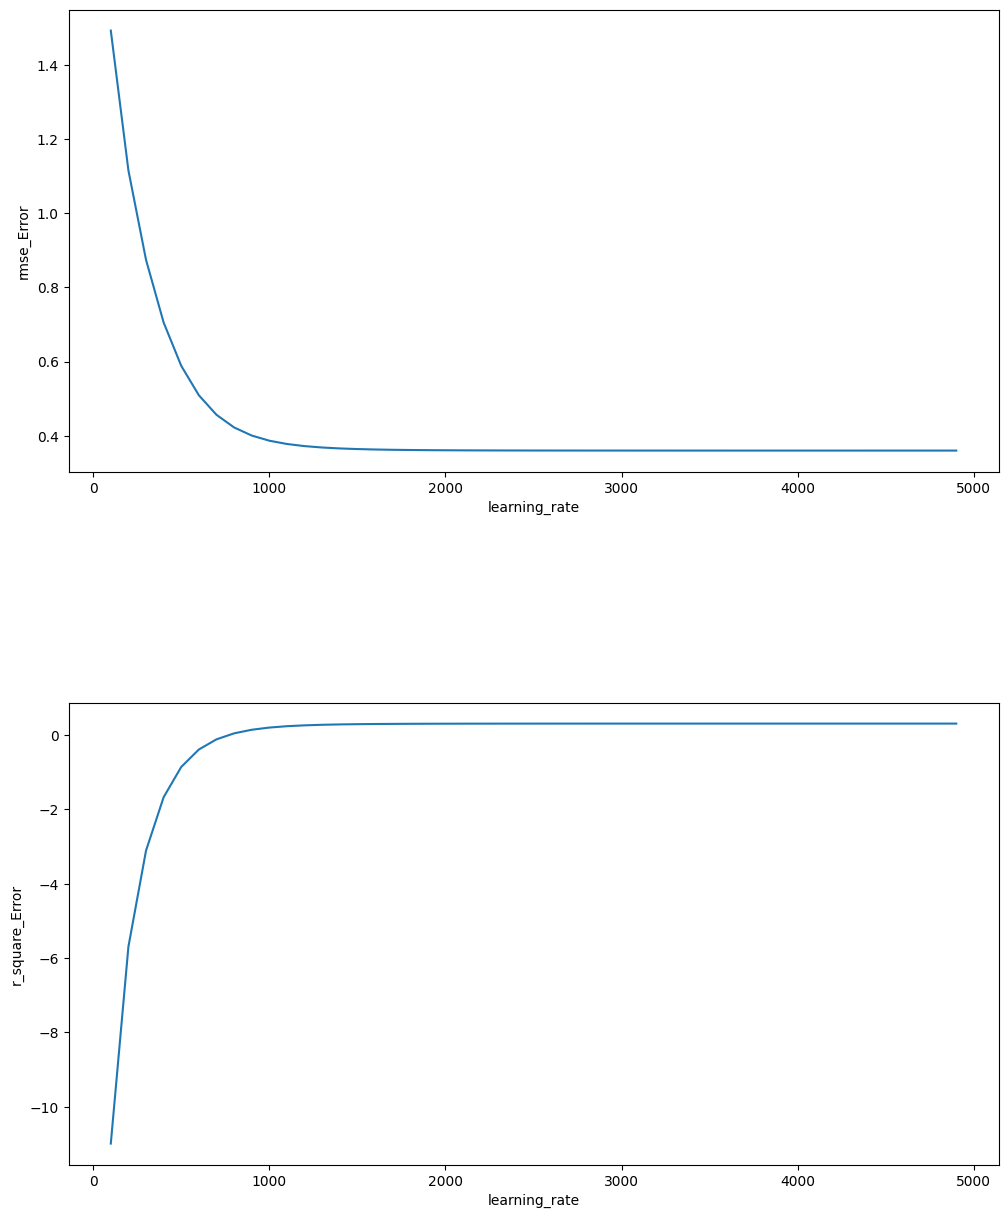

In [153]:
noise_level = 0.1
X_train_noisy = x_train + np.random.normal(loc=0, scale=noise_level, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0, scale=noise_level, size=x_test.shape)
y_train_noisy = y_train + np.random.normal(loc=0, scale=noise_level, size=y_train.shape)
y_test_noisy = y_test++ np.random.normal(loc=0, scale=noise_level, size=y_test.shape)
from tqdm import tqdm 
from sklearn.metrics import r2_score,root_mean_squared_error
residual_data = []
for i in  range(100,5000,100):
    lr1 = LinearRegresssion(learning_rate=0.30,epochs=i)
    lr1.train(X_train_noisy,y_train_noisy[:,0])
    y_pred = lr1.predict(x_test_noisy)
    r_error=(lr1.r_squared_error(y_pred=y_pred,y_true=y_test_noisy[:,0]))
    rmse_error=(root_mean_squared_error(y_true=y_test_noisy[:,0],y_pred=y_pred))
    residual_data.append([i, r_error, rmse_error])
    
residual = pd.DataFrame(residual_data,columns=['learning_rate','r_square_Error','rmse_Error'])
fig,axes = plt.subplots(2,1,figsize = (12,15))
plt.subplots_adjust(hspace=0.5)
for i,column in enumerate(residual.columns):
  if i==0: continue
  i = i-1
  ax = axes[i]
  sns.lineplot(data = residual,x= 'learning_rate',y=column,ax=axes[i-1])
#   categorical_df[column].value_counts().plot(kind='bar',ax=ax)
#   ax.set_title(column)